In [174]:
import numpy as np
from scipy.optimize import fmin
from scipy.optimize import minimize
import pdb
from numpy.linalg import pinv as inv 
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
job_list = range(1, 61)
print job_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


In [196]:
        proc = subprocess.Popen(['/bin/bash'], stdin=subprocess.PIPE, stdout=subprocess.PIPE)
        proc.communicate('./scripts/getexpert.sh -hmmdir models/htk -labdir original/lab -stream 1 -dimension '+str(20) +' -outdir expts  -filename utt'+str(1))

('', None)

In [197]:
durationFile = "expts/utt1.dur.expt"

In [198]:
def retDur(durationFile):
    durations =[]
    with open(durationFile, 'r') as f:
        lines = f.read().splitlines()
        for row in lines:
            moment = row.split()
            if len(moment)==10:
                for i in range(5):
                    durations.append(int(round(float(moment[i]))))
    return durations

In [199]:
def meansAndVar(uttfile, durations):
    with open(uttfile, "r") as f:
        means=[]
        var = []
        T = sum(durations)
        lines = f.read().splitlines()
        for line in lines:
            expts = line.split()
            if len(expts)==6:
                means.append(expts[0:3])
                var.append(expts[3:6])
        
    meansFinal = np.zeros(T * 3)
    varFinal = np.zeros(T * 3)
    
    frame = 0
    
    for i in range(len(durations)):
        for t in range(durations[i]):
            meansFinal[frame:frame+3] = means[i]
            varFinal[frame:frame+3] = var[i]
            frame+=3
    
    varFinal = np.diag(varFinal)
    
    
    
    return (meansFinal, varFinal)

In [200]:
durations = retDur(durationFile)

In [201]:
uttfile = "expts/utt1.cmp.expt"

In [202]:
def meansAndVar(uttfile, durations):
    with open(uttfile, "r") as f:
        means=[]
        var = []
        T = sum(durations)
        lines = f.read().splitlines()
        for line in lines:
            expts = line.split()
            if len(expts)==6:
                means.append(expts[0:3])
                var.append(expts[3:6])
        
    meansFinal = np.zeros(T * 3)
    varFinal = np.zeros(T * 3)
    
    frame = 0
    
    for i in range(len(durations)):
        for t in range(durations[i]):
            meansFinal[frame:frame+3] = means[i]
            varFinal[frame:frame+3] = var[i]
            frame+=3
    
    varFinal = np.diag(varFinal)
    
    
    
    return (meansFinal, varFinal)

In [203]:
means, var = meansAndVar(uttfile, durations)

In [204]:
def weightMate(durations):
    T = sum(durations)
    window = np.array([[0.0,0.0,1.0,0.0,0.0],[-0.2,-0.1,0.0,0.1,0.2],[0.285714,-0.142857,-0.285714,-0.142857,0.285714]])
    
    W = np.zeros([3*T,T])  
    frame = 0
    counter = 0
    for i in range(T):
        if i==0:
            W[frame:frame+3,0:3]= window[:,2:]
            
        elif i==1:
            W[frame:frame+3,0:4]= window[:,1:]
        
        elif frame>=1533:
            W[frame:frame+3, counter:counter+T-i+2] = window[:,:T-i+2]
            counter+=1
        else:
            
            W[frame:frame+3, counter:counter+5] = window
            counter+=1
        frame+=3
        
        
    
    return W

In [205]:
W = weightMate(durations)

In [206]:
def traj(W, means, var):
    varinv = np.linalg.pinv(var)
    varMaj = np.linalg.pinv(np.dot(np.dot(np.transpose(W),varinv),W))
    mu = np.dot(np.dot(np.dot(varMaj, np.transpose(W)),varinv),means)
    return mu, varMaj

In [207]:
trajmeans, trajvar = traj(W, means, var)

In [208]:
trajmeans

array([-5.03971839e-03, -4.99942666e-03, -1.08460817e-03, -1.36086768e-03,
       -3.51527018e-03, -3.07063738e-03, -3.35617120e-03, -3.75523258e-03,
       -3.62071036e-03, -3.81221584e-03, -3.85633278e-03, -3.85444647e-03,
       -3.91711340e-03, -3.91745036e-03, -3.93109206e-03, -3.94601544e-03,
       -3.94680397e-03, -3.95425275e-03, -3.95768083e-03, -3.96017067e-03,
       -3.96376808e-03, -3.96633442e-03, -3.97127012e-03, -3.97443001e-03,
       -3.98253623e-03, -3.99347601e-03, -3.99940303e-03, -4.03073742e-03,
       -4.04800015e-03, -4.07586399e-03, -4.17879413e-03, -4.17585880e-03,
       -4.34856157e-03, -4.58163509e-03, -4.49663993e-03, -5.36816454e-03,
       -5.58987483e-03, -5.84773678e-03, -6.69586077e-03, -7.03169019e-03,
       -7.02616869e-03, -1.00545296e-02, -1.06137713e-02, -1.09277615e-02,
       -1.35827836e-02, -1.29537987e-02, -1.20872747e-02, -1.10710273e-02,
       -6.64028092e-03, -5.85372803e-03, -1.77322516e-03,  1.86324497e-03,
       -1.80562966e-04,  

In [209]:
gmu=float(gmeans[19])
gvar = float(gsig[19])

trajvar = trajvar
x_init = np.zeros(len(trajmeans))
#x_init = trajmeans
trajvarinv = inv(trajvar)
T = sum(durations)

In [210]:
gmu

0.00820411

In [211]:
alpha = 3*T

In [212]:
def trajfunction(x):
    
    alpha = 3*T
    
    orig = (1/2)*np.dot(np.dot(np.transpose(x - trajmeans),trajvarinv), (x-trajmeans))
    globvar = (alpha/2) *(x.var()-gmu )**2/gvar
    print (orig+globvar)
    return (orig+globvar)

In [213]:
def jacobian(x):
    alpha = 3*T
    orig =  np.dot(np.transpose(x-trajmeans), trajvarinv)
    globvar = (2*alpha/(gvar*T))*(x.var()-gmu)*(x-np.mean(x))
    return (orig+globvar)

In [214]:
mini= minimize(trajfunction, x_init, jac = jacobian, method='L-BFGS-B')

15292.982953572413
8987.425456635829
357489.66489467566
1028.7514512409607
453.09618827229934
47620.162277706164
75.43764172831595
75.43764172831595
13428.188845371005
183.046514189523
81.2514743789236
75.84105027356588
75.46616976343103
75.43966188777917
75.43778479583116
75.43765186041381
75.43764244587533
75.43764177913395
75.437641731915
75.43764172857077
75.43764172833436
75.43764172831733
75.43764172831595
75.43764172831595
75.43764172831665
75.43764172831595
75.43764172831595
75.43764172831665
1.5808992379363565e+17
122379962760921.8
93814253552.4607
67613607.63658078
28980.519841839778
174.8485621984062
319.0190448838278
129.4623034046418
84.62051408749198
77.01520665196743
75.71016585828808
75.48477170937525
75.44579390256422
75.43905187472888
75.43788565397173
75.43768392236395
75.43764902700725
75.43764299083777
75.43764194670607
75.43764176609277


In [215]:
trajfunction(mini.x)

75.43764172831595


75.43764172831595

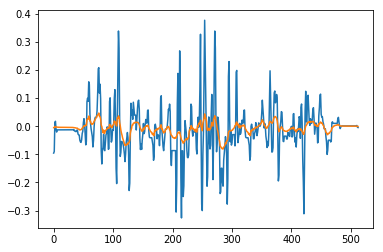

In [217]:
plt.plot(mini.x)
plt.plot(trajmeans)
plt.show()

In [15]:
gvarmean = subprocess.check_output(['./bin/x2x', '+da', 'models/hts/gv-mcep.pdf'])
gvarmean= gvarmean.split()

gmeans = gvarmean[0:60]
gsig = gvarmean[60:120]

In [134]:
minimum.x


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

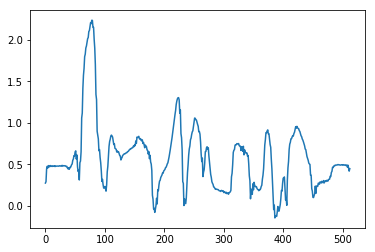

In [65]:
plt.plot(minimum)
plt.show()

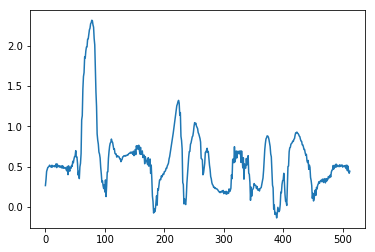

In [61]:
plt.plot(minimum)
plt.show()

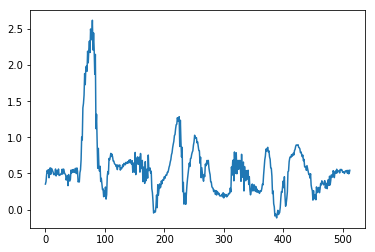

In [57]:
plt.plot(minimum)
plt.show()

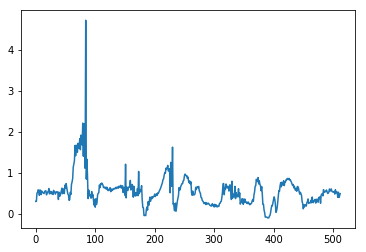

In [53]:
plt.plot(minimum)
plt.show()

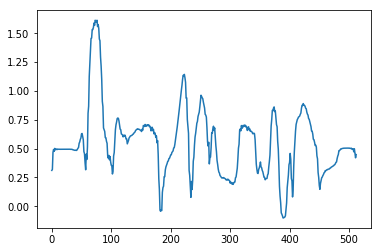

In [54]:
plt.plot(trajmeans)
plt.show()

In [86]:
trajfunction(x_init)

20585.2963953865


20585.2963953865

In [87]:
print T,trajmeans,trajvarinv,gmu,gvar

513 [ 0.20936855  0.21860795  0.35063417  0.3715678   0.36043388  0.38423823
  0.37156129  0.37473572  0.37820546  0.3739137   0.37682822  0.37618898
  0.37565491  0.37657629  0.37600581  0.37619448  0.37630046  0.37612441
  0.3762511   0.37618075  0.37616054  0.37616221  0.37605007  0.37607735
  0.37588851  0.37576304  0.37575665  0.37507179  0.37519177  0.37452847
  0.37298663  0.37396093  0.36995049  0.36877881  0.36903096  0.35304193
  0.34873421  0.33666911  0.32745321  0.31756324  0.31576248  0.29111293
  0.28106879  0.27808933  0.26056268  0.25943751  0.30239405  0.30795204
  0.31875381  0.33884519  0.31162244  0.28027104  0.19638547 -0.08268807
 -0.33532663 -0.3996012  -0.56464913 -0.56292731 -0.55033879 -0.58139122
 -0.55854813 -0.52036736 -0.5666135  -0.60680029 -0.66078522 -0.82469138
 -0.93225893 -0.93344009 -0.99813788 -0.98491252 -0.9978609  -1.02496028
 -0.99940236 -1.03122653 -1.02200156 -1.00721342 -1.0267602  -0.95454474
 -0.93057716 -0.86587447 -0.71543481 -0.6501176